In [ ]:
'''
Try to import and make the class work for GLB format. Tried several ways, the optimal is to export it to Obj with Trimesh

'''

In [5]:
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"
path_bed = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.gltf"

## Trimesh/pyrender way

In [6]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
!PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
print(os.environ['PYOPENGL_PLATFORM']) 

egl


In [7]:


import OpenGL.GL as gl
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 

None
None


In [25]:
import trimesh
import pyrender
from pyrender import Mesh
import numpy as np
import matplotlib.pyplot as plt
import cv2

from pyrender import PerspectiveCamera,\
                     DirectionalLight, SpotLight, PointLight,\
                     MetallicRoughnessMaterial,\
                     Primitive, Mesh, Node, Scene,\
                     OffscreenRenderer

In [8]:
fuze_trimesh = trimesh.load(path_bed)
bottle_trimesh = fuze_trimesh.geometry[list(fuze_trimesh.geometry.keys())[0]] #gets only the first mesh!
mesh = Mesh.from_trimesh(bottle_trimesh) 


primitive has no mode! trying GL_TRIANGLES?


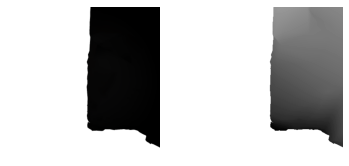

In [13]:
bottle_pose = np.array([
    [1.0, 0.0,  0.0, 0.1],
    [0.0, 0.0, -1.0, -0.16],
    [0.0, 1.0,  0.0, 0.13],
    [0.0, 0.0,  0.0, 1.0],
])
scene = pyrender.Scene()
scene.add(mesh)
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
 ])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0,
                           outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)
plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

# Trimesh to load, pytorch3d to create mesh directly from GLB

In [2]:
import trimesh
import itertools
import os
from loguru import logger
from pathlib import Path
import numpy as np
import io
import json
from PIL import Image
import torch
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    Textures,
    TexturesAtlas,
    PointsRenderer,
    PointsRasterizationSettings,
    PointsRasterizer
)


from pytorch3d.structures import Meshes

import sys
sys.path.append("../")
from rendererClass import RendererClass

import matplotlib.pyplot as plt

In [15]:
param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:0"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))

In [27]:
force_to = "scene"
save_name = "GLB_to_OBJ_force_mesh_scaled.obj"
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"
part_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/kitchen.glb"
path = Path(part_kitchen).parent.absolute()
glb_mesh = trimesh.load(part_kitchen, force = force_to)

#mesh.export(os.path.join(path,save_name))


primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL

In [35]:
glb_mesh.geometry.keys()

odict_keys(['Circle', 'Circle.001', 'Circle.002', 'Circle.003', 'Circle.004', 'Circle.005', 'Circle.008_0', 'Circle.008_1', 'Circle.007', 'Circle.009_0', 'Circle.009_1', 'Circle.010_0', 'Circle.010_1', 'Circle.011_0', 'Circle.011_1', 'Circle.012_0', 'Circle.012_1', 'Circle.013_0', 'Circle.013_1', 'Circle.014_0', 'Circle.014_1', 'Circle.015_0', 'Circle.015_1', 'Circle.016_0', 'Circle.016_1', 'Cube.043', 'Cube.006_0', 'Cube.006_1', 'Cube.003', 'Cube.007', 'Cube.008', 'Cube.009', 'Cube.010', 'Cube.011', 'Cube.012_0', 'Cube.012_1', 'Cube.012_2', 'Cube.013', 'Cube.019', 'Cube.020', 'Cube.021', 'Cube.017', 'Cube.022', 'Cube.024', 'Cube.025', 'Cube.026', 'Cube.028_0', 'Cube.028_1', 'Cube.029_0', 'Cube.029_1', 'Cube.029_2', 'Cube.029_3', 'Cube.002', 'Cube.031', 'Cube.033', 'Cube.001', 'Cube.004', 'Cube.005', 'Cube.014', 'Cube.015', 'Cube.016', 'Cube.018', 'Cube.023', 'Cube.027', 'Cube.030', 'Cube.032', 'Cube.034', 'Cube.036', 'Cube.035', 'Cube.037', 'Cube.038', 'Cube.040', 'Cube.039', 'Cube.04

In [28]:
renderer = RendererClass(params)

In [29]:
verts = torch.from_numpy(np.array(glb_mesh.vertices, dtype='float32'))[None]
faces = torch.from_numpy(np.array(glb_mesh.faces,dtype='int64'))[None]
features = torch.from_numpy(np.array(glb_mesh.visual.vertex_colors[:,0:3],dtype='float32'))[None]
tex = Textures(verts_rgb=features)


verts = verts.to(device)
faces_idx = faces.to(device) #get ids from the faces for back projecting
tex = tex.to(device)



mesh = Meshes(verts=verts, faces=faces_idx, textures = tex)
print('mesh ', mesh)




AttributeError: 'Scene' object has no attribute 'vertices'

In [23]:


example_pars = all_combs[0]
print(example_pars)
renderer_instance = renderer.get_renderer(15,example_pars[1],example_pars[2])

(2, 0, 0)


In [24]:


image = renderer_instance(mesh)[0, ..., :3].cpu().numpy()

In [25]:
save_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/example.png"
plt.imsave(save_path, image/255)

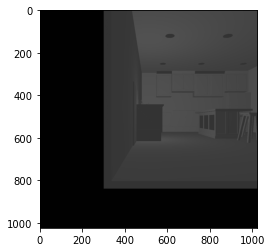

In [26]:
plt.imshow(image/255)
plt.show()